In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("train_clean.csv")

In [3]:
df


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0.0,211536,Rev,0
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053,Miss,0
888,22.0,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0.0,W./C. 6607,Miss,3
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1.0,111369,Mr,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Cabin        204 non-null    object 
 2   Embarked     891 non-null    object 
 3   Fare         891 non-null    float64
 4   Name         891 non-null    object 
 5   Parch        891 non-null    int64  
 6   PassengerId  891 non-null    int64  
 7   Pclass       891 non-null    int64  
 8   Sex          891 non-null    object 
 9   SibSp        891 non-null    int64  
 10  Survived     891 non-null    float64
 11  Ticket       891 non-null    object 
 12  Title        891 non-null    object 
 13  Family_Size  891 non-null    int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 97.6+ KB


In [7]:
cols_to_drop = ["Cabin", "Name", "PassengerId", "SibSp", "Ticket", "Title", "Family_Size"]
df = df.drop(columns=cols_to_drop)



In [8]:
df

,Age,Embarked,Fare,Parch,Pclass,Sex,Survived
0,22.0,S,7.2500,0,3,male,0.0
1,38.0,C,71.2833,0,1,female,1.0
2,26.0,S,7.9250,0,3,female,1.0
3,35.0,S,53.1000,0,1,female,1.0
4,35.0,S,8.0500,0,3,male,0.0
...,...,...,...,...,...,...,...
886,27.0,S,13.0000,0,2,male,0.0
887,19.0,S,30.0000,0,1,female,1.0
888,22.0,S,23.4500,2,3,female,0.0
889,26.0,C,30.0000,0,1,male,1.0


In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Sex' column (male -> 1, female -> 0)
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])

# Encode 'Embarked' column (S -> 2, C -> 0, Q -> 1)
le_embarked = LabelEncoder()
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

print("Sex encoding:", dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_))))
print("Embarked encoding:", dict(zip(le_embarked.classes_, le_embarked.transform(le_embarked.classes_))))
print("\nDataFrame after encoding:")
print(df.head())

Sex encoding: {'female': 0, 'male': 1}
Embarked encoding: {'C': 0, 'Q': 1, 'S': 2}

DataFrame after encoding:
    Age  Embarked     Fare  Parch  Pclass  Sex  Survived
0  22.0         2   7.2500      0       3    1       0.0
1  38.0         0  71.2833      0       1    0       1.0
2  26.0         2   7.9250      0       3    0       1.0
3  35.0         2  53.1000      0       1    0       1.0
4  35.0         2   8.0500      0       3    1       0.0


In [10]:
df

,Age,Embarked,Fare,Parch,Pclass,Sex,Survived
0,22.0,2,7.2500,0,3,1,0.0
1,38.0,0,71.2833,0,1,0,1.0
2,26.0,2,7.9250,0,3,0,1.0
3,35.0,2,53.1000,0,1,0,1.0
4,35.0,2,8.0500,0,3,1,0.0
...,...,...,...,...,...,...,...
886,27.0,2,13.0000,0,2,1,0.0
887,19.0,2,30.0000,0,1,0,1.0
888,22.0,2,23.4500,2,3,0,0.0
889,26.0,0,30.0000,0,1,1,1.0


In [13]:
coulmn=["Age","Embarked","Fare","Parch","Pclass","Sex"]
X=df[coulmn]
Y=df["Survived"]

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [16]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use transform, not fit_transform

X_train

C:\Users\adhin\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[-1.53067609,  0.59016677, -0.07602259,  1.96059048,  0.81213017,
        -1.36408001],
       [ 0.49301799,  0.59016677, -0.37635928, -0.47418932, -0.39252958,
        -1.36408001],
       [ 0.0433082 ,  0.59016677, -0.01353643, -0.47418932, -1.59718933,
         0.73309483],
       ...,
       [ 0.0433082 , -1.93776682, -0.49276495, -0.47418932,  0.81213017,
         0.73309483],
       [ 0.71787289, -0.67380003, -0.05133048,  5.61276018,  0.81213017,
        -1.36408001],
       [ 0.0433082 , -1.93776682, -0.07963469, -0.47418932, -1.59718933,
         0.73309483]])

In [35]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,Y_train.values)

LogisticRegression()

In [37]:
y_pred=clf.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.6

In [40]:
# Check missing values
print("Missing Values:")
print(df.isnull().sum())
print("\nPercentage Missing:")
print((df.isnull().sum() / len(df)) * 100)


Missing Values:
Age         0
Embarked    0
Fare        0
Parch       0
Pclass      0
Sex         0
Survived    0
dtype: int64

Percentage Missing:
Age         0.0
Embarked    0.0
Fare        0.0
Parch       0.0
Pclass      0.0
Sex         0.0
Survived    0.0
dtype: float64


Class Distribution:
Survived
0.0    549
1.0    342
Name: count, dtype: int64

Class Percentages:
Survived
0.0    61.616162
1.0    38.383838
Name: proportion, dtype: float64


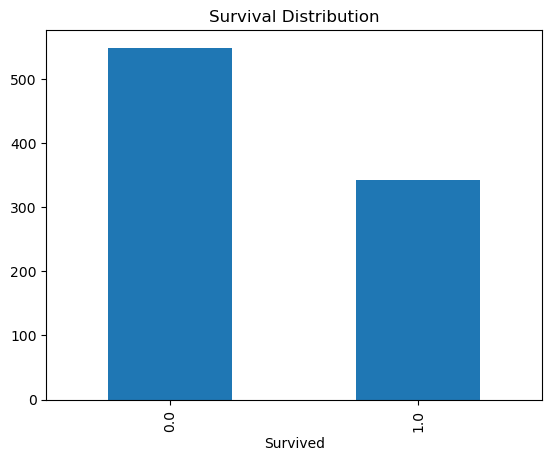

In [41]:
# Check target variable balance
print("Class Distribution:")
print(df['Survived'].value_counts())
print("\nClass Percentages:")
print(df['Survived'].value_counts(normalize=True) * 100)

# Visualize (optional)
import matplotlib.pyplot as plt
df['Survived'].value_counts().plot(kind='bar')
plt.title("Survival Distribution")
plt.show()


In [42]:
# Fix Y_train to be array-like consistently
from sklearn.model_selection import train_test_split

columns = ["Age", "Embarked", "Fare", "Parch", "Pclass", "Sex"]
X = df[columns]
Y = df["Survived"].values  # Convert to array here

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Now ALL are arrays - consistent!
print(type(X_train), type(Y_train))  # Both should be numpy arrays


<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predictions
y_pred = clf.predict(X_test)

# All metrics
print("=== MODEL EVALUATION ===")
print(f"Accuracy:  {accuracy_score(Y_test, y_pred):.4f}")
print(f"Precision: {precision_score(Y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(Y_test, y_pred):.4f}")
print(f"F1-Score:  {f1_score(Y_test, y_pred):.4f}")

print("\n=== CONFUSION MATRIX ===")
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("\n(Row=Actual, Col=Predicted)")
print(f"True Negatives: {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives: {cm[1,1]}")

print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(Y_test, y_pred))


=== MODEL EVALUATION ===
Accuracy:  0.5922
Precision: 1.0000
Recall:    0.0135
F1-Score:  0.0267

=== CONFUSION MATRIX ===
[[105   0]
 [ 73   1]]

(Row=Actual, Col=Predicted)
True Negatives: 105
False Positives: 0
False Negatives: 73
True Positives: 1

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

         0.0       0.59      1.00      0.74       105
         1.0       1.00      0.01      0.03        74

    accuracy                           0.59       179
   macro avg       0.79      0.51      0.38       179
weighted avg       0.76      0.59      0.45       179



C:\Users\adhin\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [44]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', 
                                     classes=np.unique(Y_train), 
                                     y=Y_train)
class_weight_dict = dict(zip(np.unique(Y_train), class_weights))

# Train with class weights
clf = LogisticRegression(class_weight='balanced', max_iter=1000)
clf.fit(X_train, Y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [45]:
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8044692737430168